### Classify CIFAR-10 images using CNN features

In [11]:
import pickle
import numpy as np

### Load CNN data features and labels

The voting ensemble increased the classification accuracy from 0.815 (LinearSVC only) to 0.817.

### Plot images in the feature space

In [4]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(features_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
# To be removed!
from load_cifar import load_batch

### Import data
X_train, y_train = load_batch()
X_test, y_test = load_batch(test=True)

### Subset data to 1/10th
n_train = X_train.shape[0] // 2
X_train = X_train[0:n_train]
y_train = y_train[0:n_train]
print("Number of training images:", n_train)
# Number of training images: 5000

n_test = X_test.shape[0] // 10
X_test = X_test[0:n_test]
y_test = y_test[0:n_test]
print("Number of testing images:", n_test)
# Number of testing images: 1000

Number of training images: 5000
Number of testing images: 1000


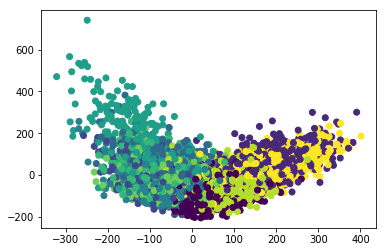

In [8]:
    import matplotlib.pyplot as plt
    features_pca = pca.transform(features_train)
    plt.scatter(features_pca[:,0],features_pca[:,1],c=y_train)
    plt.savefig("cifar10_pca.png")

### Pick optimal hyperparameter C for SVM classification

In [9]:
# Split training data into training and validation
from sklearn.model_selection import train_test_split
features_train_sub, features_val, y_train_sub, y_val = train_test_split(features_train, y_train, test_size=0.2)

In [32]:
# Record validation accuracy
from sklearn.svm import LinearSVC
accuracy_val = []
c_options = np.logspace(-3, 2, 6)
clf = LinearSVC(C=c)
for c in c_options:
    print("\nParameter value:",c)    
    results = model_selection.cross_val_score(clf, features_train, y_train)

    acc = np.mean(results)
    accuracy_val.append(acc)
    print("Accuracy:",acc)


Parameter value: 0.001


Accuracy: 0.8332114570152745

Parameter value: 0.01


Accuracy: 0.8332114570152745

Parameter value: 0.1


Accuracy: 0.8332114570152745

Parameter value: 1.0


Accuracy: 0.8332114570152745

Parameter value: 10.0


Accuracy: 0.8332114570152745

Parameter value: 100.0


Accuracy: 0.8332114570152745


Note that the performance of SVM in our classification task does not depend on C in the given range. Hence, we leave the default C=1 in the following experiments.

### Train SVM

In [33]:
### Train SVM
from sklearn.svm import LinearSVC
clf = LinearSVC()

print("Training...")
clf.fit(features_train, y_train)

print("Testing...")
print("Testing accuracy:",clf.score(features_test, y_test))

Training...


Testing...
Testing accuracy: 0.815


### Extension: voting ensemble

The idea is to boost the classification accuracy using voting to combine predictions from multiple machine learning classifiers (logistic regression, decision tree classifier, linear SVM).

In [18]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2)) 
model3 = LinearSVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, features_train, y_train)
print(results)
np.mean(results)

/Users/kirakempinska/Dropbox/tooploox/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/Users/kirakempinska/Dropbox/tooploox/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0.81845416 0.84813926 0.84384384]


/Users/kirakempinska/Dropbox/tooploox/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8368124212387622

In [31]:
print("Testing...")
ensemble.fit(features_train, y_train)
print("Testing accuracy:",ensemble.score(features_test, y_test))

Testing...


Testing accuracy: 0.817


/Users/kirakempinska/Dropbox/tooploox/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The voting ensemble increased the classification accuracy from 0.815 (LinearSVC only) to 0.817.